# Lung Cancer Classification using CNNs

## Introduction
This project focuses on classifying lung cancer images into four categories:
- Adenocarcinoma
- Large Cell Carcinoma
- Normal
- Squamous Cell Carcinoma

We use a Convolutional Neural Network (CNN) for image classification, training it on the Kaggle dataset of lung cancer images. The objective is to evaluate the model's performance and analyze the results.

## Dataset Description
The dataset contains three splits:
- **Train**: Images for training the model.
- **Test**: Images for evaluating the model.
- **Validation**: Images for fine-tuning the model.

Each split has four classes. The dataset is loaded from the `DataB` folder with the following structure:


- **Classes and Indices**:
  - Adenocarcinoma: 0
  - Large Cell Carcinoma: 1
  - Normal: 2
  - Squamous Cell Carcinoma: 3


In [1]:
import os
import numpy as np
import cv2
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Loading and Preprocessing the Data
We will use Keras' `ImageDataGenerator` to load and preprocess the image data. This class also allows us to apply real-time data augmentation to improve model performance. The images will be resized to 150x150 pixels, normalized, and split into training, validation, and testing sets.

We’ll also apply basic augmentations, like rotations and flips, to increase the variety in the training set.


In [3]:
# Define paths to the dataset
base_dir = 'Data_B'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image data generators for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


## Building the CNN Model
We'll create a Convolutional Neural Network (CNN) to classify the images into one of the four cancer types or normal. The model consists of:
- **Convolutional layers**: To extract features from images.
- **Max-pooling layers**: To downsample the feature maps.
- **Fully connected (dense) layers**: To perform classification.

The model will be compiled using the Adam optimizer with categorical cross-entropy loss, as we are dealing with a multi-class classification problem.


In [4]:
# Build the CNN model
model = Sequential()

# Convolutional layer with 32 filters and 3x3 kernel
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 64 filters and 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 128 filters and 3x3 kernel
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Dense layer with 512 units and dropout for regularization
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 4 units (one for each class) and softmax activation
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/Users/muhammadimran/miniforge3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.5464 - loss: 0.9297 - val_accuracy: 0.5156 - val_loss: 0.9020
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4375 - loss: 1.0887 - val_accuracy: 0.4844 - val_loss: 1.0402
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.5390 - loss: 0.9761 - val_accuracy: 0.5938 - val_loss: 0.8689
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5938 - loss: 0.8607 - val_accuracy: 0.5938 - val_loss: 0.8526
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.5914 - loss: 0.9087 - val_accuracy: 0.4531 - val_loss: 1.0319
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 1.0547 - val_accuracy: 0.4688 - val_loss: 0.9473
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.5961 - loss: 0.9008 - val_accuracy: 0.5000 - val_loss: 0.9811
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6250 - loss: 0.8409 - val_accuracy: 0.5312

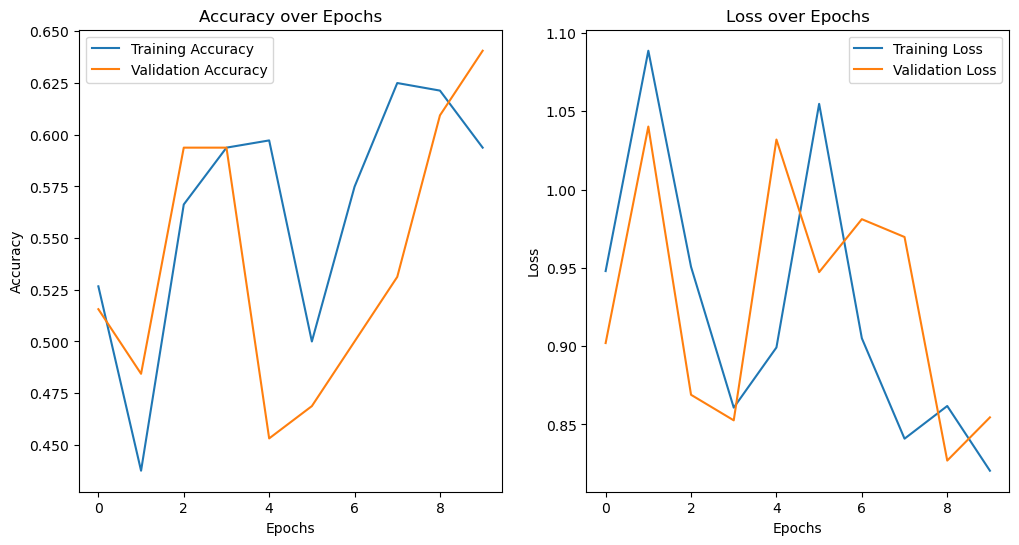

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

# Plot the training and validation accuracy and save as PDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss and save as PDF
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the plot as PDF
plt.savefig('training_results.pdf', format='pdf')
plt.show()


## Evaluating the Model
We will now evaluate the model on the test dataset. This will provide us with metrics such as accuracy, precision, recall, and F1-score.

Additionally, we will generate a **confusion matrix** to visualize how well the model is classifying the different cancer types. We will also display a **classification report** that shows precision, recall, and F1-score for each class.


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Length of true classes: 315
Length of predicted classes: 315


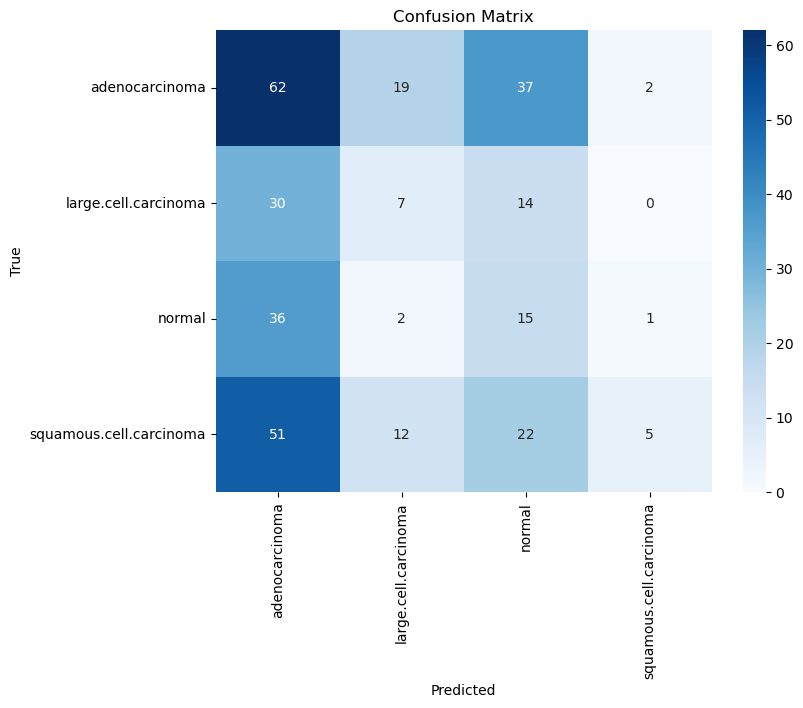

Classification Report:
                          precision    recall  f1-score   support

         adenocarcinoma       0.35      0.52      0.41       120
   large.cell.carcinoma       0.17      0.14      0.15        51
                 normal       0.17      0.28      0.21        54
squamous.cell.carcinoma       0.62      0.06      0.10        90

               accuracy                           0.28       315
              macro avg       0.33      0.25      0.22       315
           weighted avg       0.37      0.28      0.25       315



<Figure size 640x480 with 0 Axes>

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Reset the test generator
test_generator.reset()

# Predict on the entire test set using the correct steps
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Check the lengths again
print(f"Length of true classes: {len(true_classes)}")
print(f"Length of predicted classes: {len(predicted_classes)}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Save the plot as a PDF file
plt.savefig('confusion_matrix.pdf', format='pdf')

# Classification Report
cr = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", cr)